In [13]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, UpSampling2D,Input
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing import image
import keras
from keras import layers,Model
from math import log10, sqrt

In [14]:
train_path = '/kaggle/input/tumor-brain/Training/pituitary_tumor/'
test_path = '/kaggle/input/tumor-brain/Testing/pituitary_tumor/'
train = []
for filename in os.listdir(train_path):
    if filename.endswith('.jpg'):
        img = image.load_img(train_path + filename, target_size=(128, 128))
        img = image.img_to_array(img)
        train.append(img)
train = np.array(train)

test = []
for filename in os.listdir(test_path):
    if filename.endswith('.jpg'):
        img = image.load_img(test_path + filename, target_size=(128, 128))
        img = image.img_to_array(img)
        test.append(img)
test = np.array(test)

In [15]:
x_train = train.astype('float32') / 255
x_test = test.astype('float32') / 255

In [16]:
def show_data(X, n=10,title=""):
    plt.figure(figsize=(10, 3))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

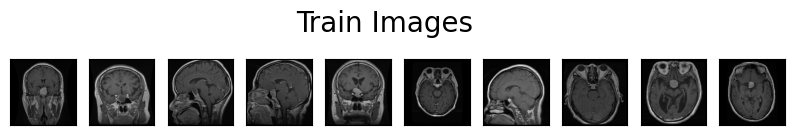

In [17]:
show_data(x_train,title= "Train Images")

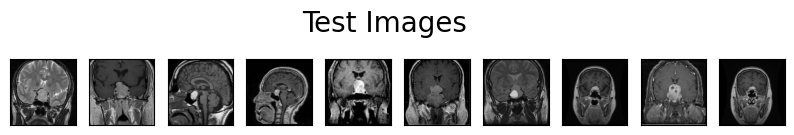

In [18]:
show_data(x_test,title= "Test Images")

In [19]:
input_img = Input(shape=(128, 128, 3))
x = Conv2D(128, kernel_size=(3,3), activation="relu", padding = "same")(input_img)
x = MaxPooling2D(pool_size = (2,2), padding = "same")(x)
x = Conv2D(64, kernel_size=(3,3), activation="relu", padding = "same")(x)
encoded = MaxPooling2D(pool_size = (2,2), padding = "same")(x)
x = Conv2D(64, kernel_size=(3,3), activation="relu", padding = "same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(128, kernel_size=(3,3), activation="relu", padding = "same")(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(3, kernel_size=(3,3), activation="sigmoid", padding = "same")(x)

In [20]:
autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer="adam",loss = "binary_crossentropy",metrics = ["mean_squared_error"])
print(autoencoder.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 128, 128, 3)         │           3,459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191,619 (748.51 KB)

 Trainable params: 191,619 (748.51 KB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
hist = autoencoder.fit(x_train,x_train,epochs = 50,batch_size = 4,validation_data = (x_test,x_test),verbose = 1)

Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.4800 - mean_squared_error: 0.0302 - val_loss: 0.4573 - val_mean_squared_error: 0.0070
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4034 - mean_squared_error: 0.0037 - val_loss: 0.4530 - val_mean_squared_error: 0.0055
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4016 - mean_squared_error: 0.0030 - val_loss: 0.4513 - val_mean_squared_error: 0.0049
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4012 - mean_squared_error: 0.0027 - val_loss: 0.4494 - val_mean_squared_error: 0.0042
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3988 - mean_squared_error: 0.0025 - val_loss: 0.4488 - val_mean_squared_error: 0.0040
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3984 - mean_squared_error: 0.0023 - val_loss: 0.4478 - val_mean_squared_error: 0.0036
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3982 - mean_squared_error: 0.0022 - val_los

In [22]:
def psnr(original, reconstructed):
    # Ensure images have the same shape and type
    if original.shape != reconstructed.shape or original.dtype != reconstructed.dtype:
        raise ValueError("Original and reconstructed images must have the same shape and type")

    # Calculate the MSE
    mse = np.mean((original - reconstructed) ** 2)

    # Calculate the maximum possible pixel value
    max_pixel = np.max(original)

    # Calculate PSNR
    psnr = 10 * np.log10((max_pixel ** 2) / mse)

    return psnr

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/tmp/ipykernel_31/3381730935.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  psnr = 10 * np.log10((max_pixel ** 2) / mse)


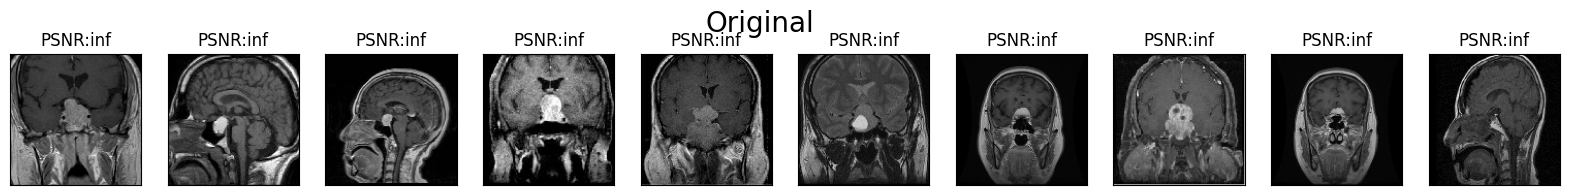

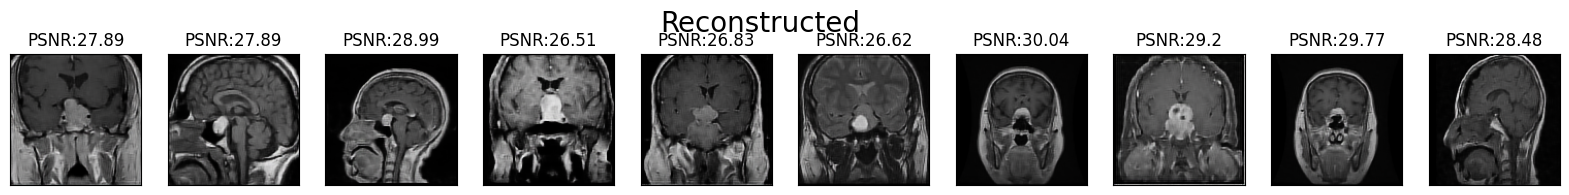

In [24]:
decoded_images = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
        # Display original
        plt.suptitle("Original", fontsize = 20)
        ax = plt.subplot(2, n, i)
        plt.imshow(x_test[i].reshape(128,128,3))
        plt.gray()
        plt.title(f"PSNR:{round(psnr(x_test[i],x_test[i]),2)}")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20,4))

for i in range(1, n + 1):
        # Display reconstruction
        plt.suptitle("Reconstructed", fontsize = 20)
        ax = plt.subplot(2, n, i)
        plt.imshow(decoded_images[i].reshape(128,128,3))
        plt.gray()
        plt.title(f"PSNR:{round(psnr(x_test[i],decoded_images[i]),2)}")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()